# PCHN63101: ANOVA Workshop

## Model Assumptions with Dummy Variables
Last week, we spent a lot of time discussing model assumptions and ways to address violations of assumptions. Although this was framed within multiple regression, we know that our aim here is to provide a *generic framework* for different types of analyses. In the accompanying lesson, we discovered that a $t$-test and ANOVA are effectively multiple regression in disguise. Part of the utility of this is that if these methods are just multiple regression, we can treat them in exactly the same way as any othe regression model. This is particularly useful when it comes to the assumptions because these are *exactly the same*. This means we can use the same diagnostic plots with the same interpretation *and* can use the same methods of adjusting violations of assumptions.

### Assumptions in a $t$-test
To simplest way to illustrate this connection is to use a basic $t$-test model. We will have a look at an ANOVA a little further below. To start with, we will use the `vs` variable from `mtcars` as a factor with two levels. In the code below, we can how to use the `factor()` function to turn the original `vs` variable into a factor with labels for each level.

In [1]:
data(mtcars)
mtcars$vs <- factor(mtcars$vs, levels=c(0,1), labels=c('V-shaped','Straight'))

We can now fit the model and view the summary

In [2]:
vs.mod <- lm(mpg ~ vs, data=mtcars)
summary(vs.mod)


Call:
lm(formula = mpg ~ vs, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-6.757 -3.082 -1.267  2.828  9.383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.617      1.080  15.390 8.85e-16 ***
vsStraight     7.940      1.632   4.864 3.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.581 on 30 degrees of freedom
Multiple R-squared:  0.4409,	Adjusted R-squared:  0.4223 
F-statistic: 23.66 on 1 and 30 DF,  p-value: 3.416e-05


So we can see that there is a significant effect of engine shape ($t_{30} = 4.86, p < 0.001$), which matches what we would get from a basic $t$-test

In [3]:
t.test(mpg ~ vs, data=mtcars, var.equal=TRUE)


	Two Sample t-test

data:  mpg by vs
t = -4.8644, df = 30, p-value = 3.416e-05
alternative hypothesis: true difference in means between group V-shaped and group Straight is not equal to 0
95 percent confidence interval:
 -11.274221  -4.606732
sample estimates:
mean in group V-shaped mean in group Straight 
              16.61667               24.55714 


However, part of the utility of the approach using `lm()` is that we can now assess all the assumptions of the $t$-test using our familiar diagnostic plots

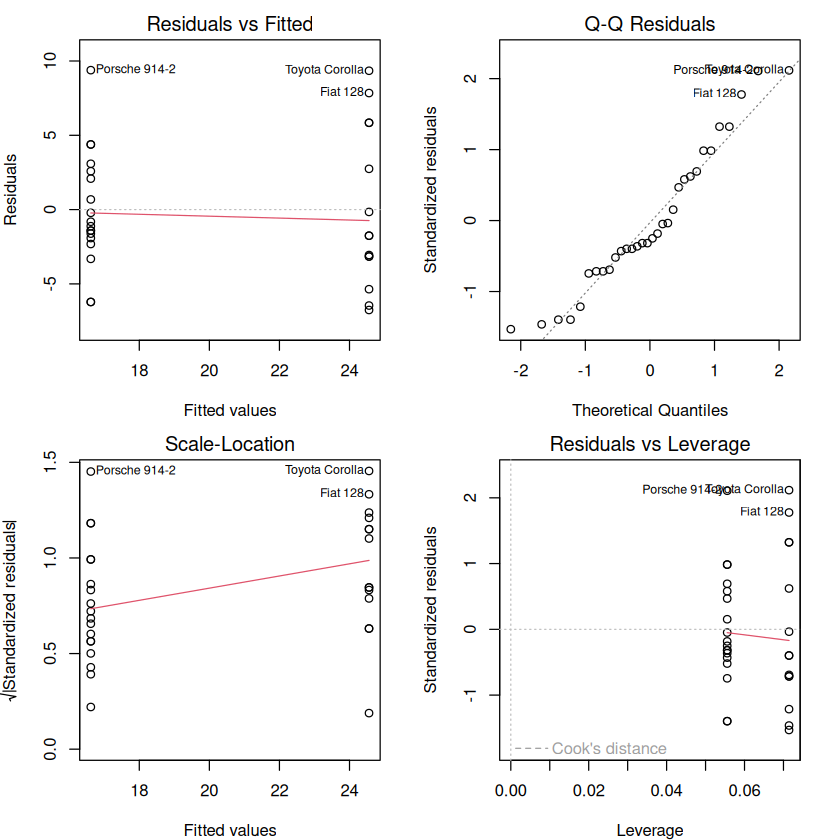

In [4]:
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(vs.mod)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Before reading on, refer back to the interpretation of these plots from last week. Think about what they mean in the context of a $t$-test model and whether you think they are all still relevant?
</div>

In terms of interpreting these, we have the following guidance:

#### Residuals vs Fitted
The *Residuals vs Fitted* plot is less relevant with dummy variable models because the assumption of linearity is always met. All we are doing is drawing a line between the means of the two categories. The values in-between are not meaningful in the sense that a dummy value of 0.5 is not somehow half-way between the two groups. Because of this, there no sense in which having a curved line between the categories would make much sense. Indeed, this could not actually be fitted because a polynomial requires fewer unique points than degrees. If we had 3 categories, we could fit a *quadratic* curve through them, but this would require us to order the categories in some fashion, which is rarely meaningful.

#### Q-Q Residuals
Moving on to the *Q-Q Residuals* plot, this one *is* relevant for our simple $t$-test model. Remember, the normality assumption can also be thought of as the normality of the outcome variable *conditional* on the values of the predictor. When we have a dummy variable, the predictor only has *two* values, meaning that the assumption is that the data is normally distributed for each value of the dummy variable. In other words, normality is assumed *within each group*. In context, this means that the `Straight` engine group is normally distributed and the `V-shaped` engine group is normally distributed. This is a natural simplification of what we have seen before and means that this is one of the rarer cases where we could actually split the raw data into the two groups and then assess normality using the *outcome variable*. However, this is unnecessary when we can just stick to looking at the standardised residuals as usual.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Imagine you are working with a researcher who has not had the benefit of a very thorough statistical education. They decide to assess the normality assumption by producing a single histogram of the whole outcome variable. Why is this wrong and how would you try and explain this to them? 
</div>

#### Scale-Location
In terms of the *Scale-Location* plot, this is also of importance because the traditional $t$-test assumes homogeneity of variance. In other words, that the variance of the population distribution that each group is sampled from is identical. This can be assessed in the same fashion as any other regression model, where we look for an equal scattering of points around the horizontal line.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Can you remember from last week what method we could use to accommodate heterogeneity of variance in a regression model?
</div>

#### Residuals vs Leverage
Finally, for the *Residuals vs Leverage* plot, our main concern is *outliers*. Notice that all data points within the same category have the same amount of leverage. As such, there is little sense in trying to interpret leverage in these types of model. If a single category has high leverage, all that means is that the group average is quite different from the other categories. Given that this is what we are interested in, it does not really matter, especially as this will not just be a single datapoint influencing the fit but a whole *group* of datapoints. Outliers, however, will matter because they will potentially bias the group means.

### Assumption Violations in the $t$-test
Based on the plots above, there are not many concerns here. However, we know from last week that we have several options available to us if we are concerned. One of the key ones for $t$-test and ANOVA models is the use of GLS to accommodate heterogeneity of variance. Let us see this in action for the example above.

In [5]:
library(nlme)
vs.mod.gls <- gls(mpg ~ vs, data=mtcars, weights=varIdent(form= ~ 1|vs))
summary(vs.mod.gls)

Generalized least squares fit by REML
  Model: mpg ~ vs 
  Data: mtcars 
       AIC      BIC    logLik
  188.3395 193.9443 -90.16977

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | vs 
 Parameter estimates:
V-shaped Straight 
1.000000 1.393265 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 16.616667 0.9099756 18.260563   0e+00
vsStraight   7.940476 1.7013899  4.667053   1e-04

 Correlation: 
           (Intr)
vsStraight -0.535

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.6102436 -0.5869410 -0.3079540  0.7015136  2.4304750 

Residual standard error: 3.860699 
Degrees of freedom: 32 total; 30 residual

In this example, we have used the `varIdent()` variance function, which tells GLS to fit a constant variance that depends upon the `form=` argument. Here, we specify `~ 1|vs`, which means a constant variance for each level of `vs`. This means we get a different variance estimated for `V-shaped` and a different variance for `Straight`. 

In this instance, it has not made much difference to the results. However, it is interesting to compare it to the results of `t.test()` which has a `var.equal=` option. When set to `FALSE`, this implements a variant of the $t$-test known as Welch's $t$-test, which allows for different variances in each group. Note that both these solutions are *approximations*, as finding null distributions and $p$-values from population distributions with different variances is an unsolved issue in statistics known as the Behrens-Fisher problem. 

In [6]:
t.test(mpg ~ vs, data=mtcars, var.equal=FALSE)


	Welch Two Sample t-test

data:  mpg by vs
t = -4.6671, df = 22.716, p-value = 0.0001098
alternative hypothesis: true difference in means between group V-shaped and group Straight is not equal to 0
95 percent confidence interval:
 -11.462508  -4.418445
sample estimates:
mean in group V-shaped mean in group Straight 
              16.61667               24.55714 


We can see here that, apart from the degrees of freedom, these two results match. So, we can use GLS in this instance as a general-purpose tool for accommodating heterogeneity of variance that subsumes Welch's $t$-test.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Try using <code>lmperm</code> and <code>lmrob</code> with this example to accommodate non-normality and outliers.
</div>

### Assumptions and Violations in an ANOVA
The same approach shown above can be generalised for ANOVA models. To see this, let us return to the example of `origin` with 3 levels from the lesson. Including this factor alongside `vs` gives us a $2 \times 3$ ANOVA model. First we create the `origin` factor

In [7]:
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

mtcars$origin <- as.factor(mtcars$origin)

Next, we have an additional complication we need to address. In our $2 \times 3$ design, we now have a cell that only contains *two* datapoints, both of which have *the same* value of MPG

In [8]:
mtcars$mpg[mtcars$origin == 'Japan' & mtcars$vs == 'V-shaped']

[1] 21 21

This is a problem because this cell contains *no variance*. As such, to make sure the examples below still work, we will alter the data to change one of these. This is purely for demonstration and obviously is not an exercise in condoning data tampering! So, with this in mind, we change the MPG of one of these cars from 21 to 18.

In [9]:

mtcars['Mazda RX4 Wag',]$mpg <- 18

Then, we can specify the model and examine the assumptions

Loading required package: carData



Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value    Pr(>F)    
vs        305.69  1 17.5762 0.0002826 ***
origin    150.68  2  4.3318 0.0237849 *  
vs:origin   8.83  2  0.2540 0.7776033    
Residuals 452.20 26                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


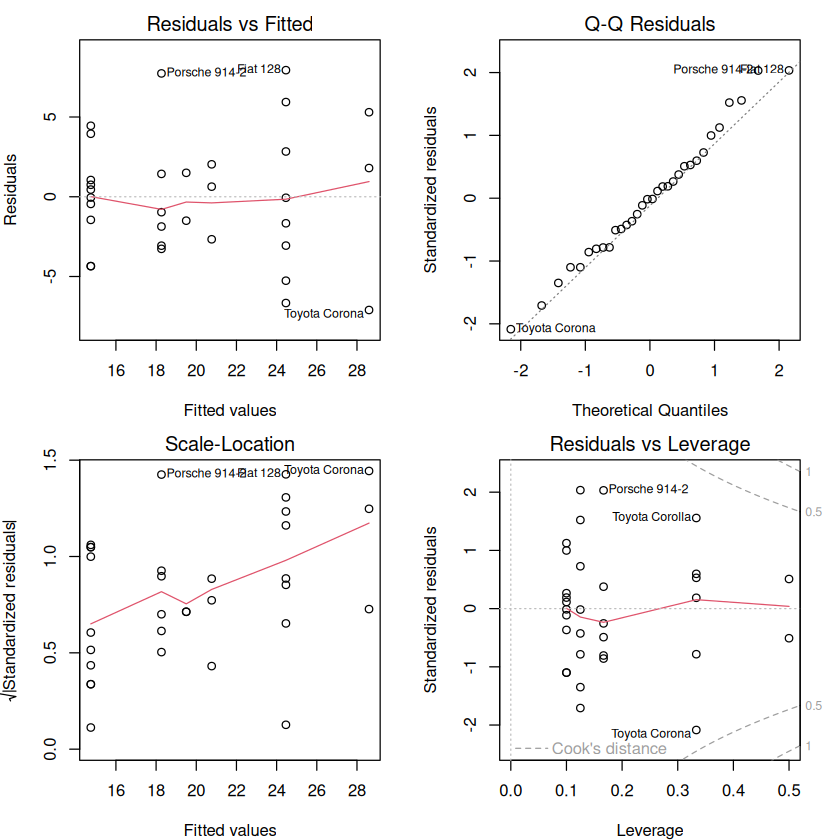

In [10]:
library(car)

twoway.mod <- lm(mpg  ~ vs*origin, data=mtcars)
print(Anova(twoway.mod))

par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(twoway.mod)

Based on these plots, normality seems OK and there are no obvious outliers (using $|t_{i}| > 3$). However, the variance looks like it differs across the different cells of the design, which we can see as the vertical stacks of points in the plots. 

In order to accmmodate different variances for each factor, we can use the `varIdent()` function, but specify the grouping factor as the *interaction* between `vs` and `origin`. This will result in a separate variance term for each cell of the design.

In [11]:
twoway.mod.gls <- gls(mpg ~ vs*origin, data=mtcars, weights=varIdent(form= ~ 1|vs*origin))
summary(twoway.mod.gls)

Generalized least squares fit by REML
  Model: mpg ~ vs * origin 
  Data: mtcars 
      AIC      BIC   logLik
  176.039 191.1362 -76.0195

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | vs * origin 
 Parameter estimates:
 V-shaped*Japan    Straight*USA    V-shaped*USA Straight*Europe V-shaped*Europe 
       1.000000        1.137574        1.382652        2.459440        1.959062 
 Straight*Japan 
       3.013673 

Coefficients:
                           Value Std.Error   t-value p-value
(Intercept)            18.266667  1.696598 10.766643  0.0000
vsStraight              6.195833  2.506177  2.472225  0.0203
originJapan             1.233333  2.264607  0.544612  0.5907
originUSA              -3.516667  1.933578 -1.818736  0.0805
vsStraight:originJapan  2.904167  4.706832  0.617011  0.5426
vsStraight:originUSA   -0.179167  3.013687 -0.059451  0.9530

 Correlation: 
                       (Intr) vsStrg orgnJp orgUSA vsSt:J
vsStraight             -0.

We can compare the Scale-Location plot between the two methods to see the effect

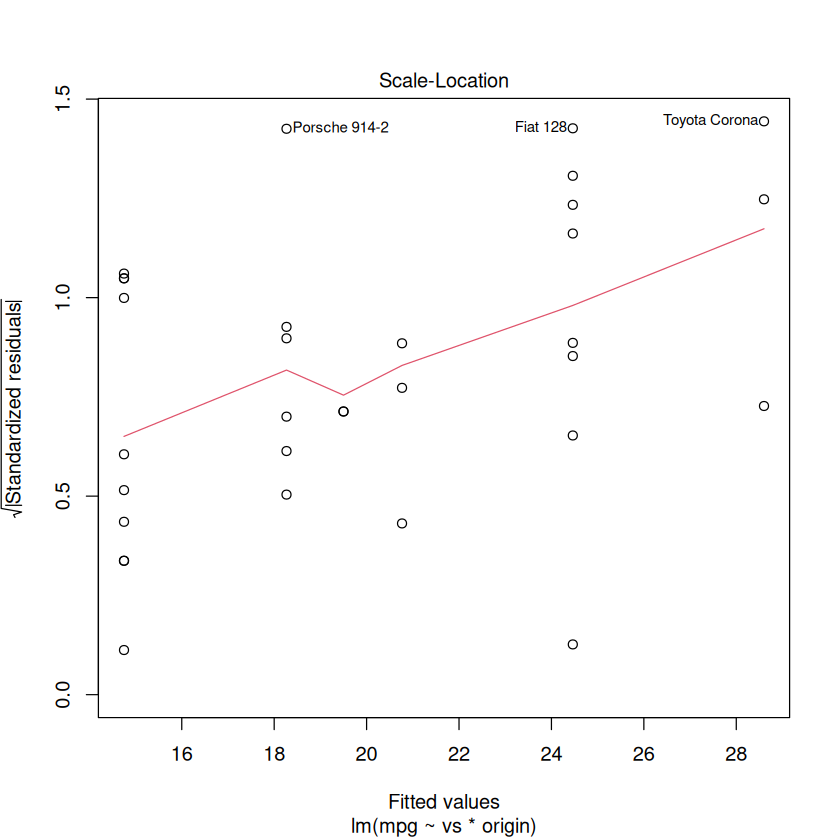

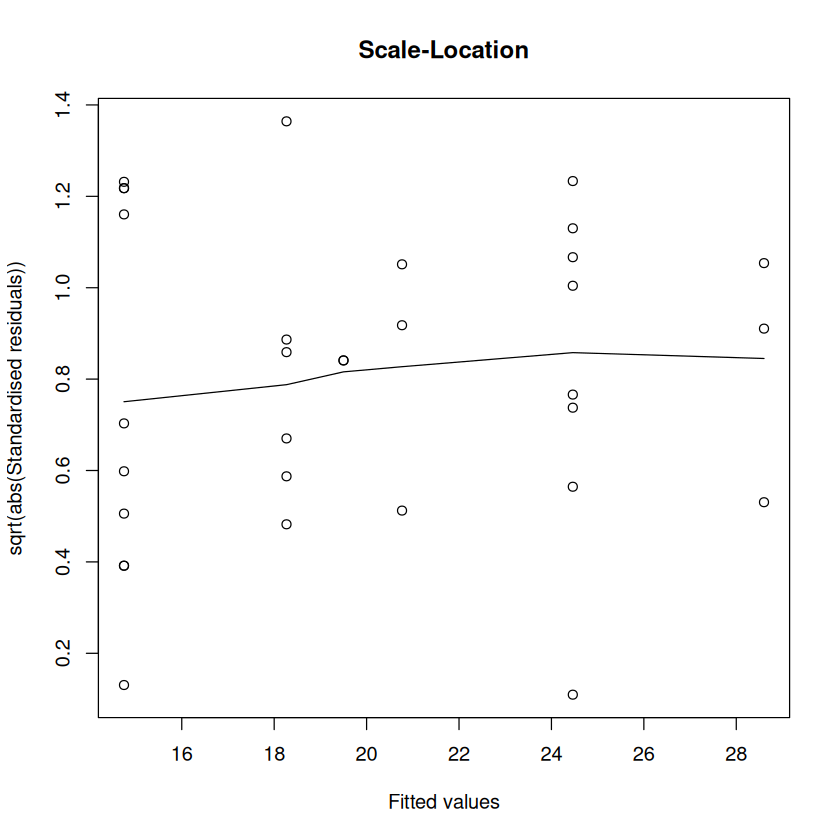

In [12]:
# Scale-Location from lm()
plot(twoway.mod, which=3)

# Scale-Location from gls()
fit.val <- fitted(twoway.mod.gls)
res.std <- residuals(twoway.mod.gls, type="pearson")

plot(fit.val, 
     sqrt(abs(res.std)), 
     xlab="Fitted values", 
     ylab="sqrt(abs(Standardised residuals))",
     main="Scale-Location")

lines(lowess(fit.val, sqrt(abs(res.std))))

So, the GLS model is much flatter, suggesting an equalisation of the variance across the cells of the design. We can now consider the ANOVA omnibus effects

In [13]:
print(Anova(twoway.mod.gls))

Analysis of Deviance Table (Type II tests)

Response: mpg
          Df   Chisq Pr(>Chisq)    
vs         1 23.7327  1.107e-06 ***
origin     2 13.5134   0.001163 ** 
vs:origin  2  0.5184   0.771688    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Notice that `Anova()` from `car` provides asymptotic $\chi^{2}$ tests by default, instead of $F$-tests. This is because the notion of degrees of freedom in the GLS model is quite controversial. In simple terms, the degrees of freedom of a GLS model will be different from OLS because of the additional variance parameters. Although you might think we can just include these in the calculation of the degrees of freedom, variance and correlation parameters do not influence the model in the same way. It is no longer "1 parameter = 1 lost degree of freedom". In fact, the extra complication of adding these makes the degrees of freedom *impossible* to calculate. This actually suggests that the whole concept of degrees of freedom breaks-down here. The best we can do is calculate *effective* degrees of freedom. These are, to put it bluntly, a *guess* used to make inference work, not a defensible and real quantity.

Based on this, we have two options for inference here. The first is a blind guess for the degrees of freedom. This is what `gls()` does in terms of reporting the $t$-statistics and $p$-values. The second option is to ignore the whole concept and base inference on test-statistics that do not need the residual degrees of freedom. We know these will not necessarily be accurate in small samples, but *asymptotically* they will be correct. This is what the `Anova()` function will do. 

If we *really* care about this and *really* want $F$-statistics, we can use the effective degrees of freedom from the `gls()` summary with `Anova()`. We can see at the bottom of the summary table above it says: `Degrees of freedom: 32 total; 26 residual`. Remember, this is a wild guess that has not taken the variance parameters into account. Nevertheless, we can plug this into `Anova()`

In [14]:
print(Anova(twoway.mod.gls, test.statistic="F", error.df=26))

Analysis of Deviance Table (Type II tests)

Response: mpg
          Df       F    Pr(>F)    
vs         1 23.7327 4.716e-05 ***
origin     2  6.7567  0.004335 ** 
vs:origin  2  0.2592  0.773658    
Residuals 26                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


and now we have more traditional ANOVA tests. However, do not discount the fact that these are *very approximate*. As we can see NHST continues to cause problems as our methods gets more complex and sophisticated.

## The Regression ANOVA $F$-test
As a final point, it is interesting to note that we did not actually need to do any of the calculations above, because the results were provided all along at the bottom of the summary table for the full model.

In [15]:
summary(full.mod)

ERROR: Error in eval(expr, envir, enclos): object 'full.mod' not found


Notice that the very last line says:

`F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947`

which is exactly the results from the ANOVA table. In general, it is customary to always provide an omnibus test of the *whole* regression model, by comparing the full model to a model containing only an intercept. Because this model only contains a single predictor, this is then equivalent to the one-way ANOVA. In general, if there are multiple predictor variables, this will not be the same. However, the omnibus regression test is useful as a single way of asking the question "is our model actually doing anything?" or "is our model any better than just fitting an intercept?"

## 3-way ANOVA and Beyond

## Other Model Comparison Methods

### $R^{2}$

### AIC and BIC